# 🌲 Forest Cover Type Classification using Random Forest

This project uses the **Covertype Dataset** from the UCI Machine Learning Repository to classify forest cover types based on cartographic variables using a Random Forest Classifier.

**Steps covered in this notebook:**
1. Load and preprocess data
2. Visualize basic info
3. Split the dataset
4. Train a Random Forest model
5. Evaluate the model
6. Show feature importances


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



### 📥 Load Dataset and Assign Column Names

The dataset doesn't come with headers, so we assign column names manually.


In [5]:
columns = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
    'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
] + [f'Wilderness_Area{i}' for i in range(1, 5)] \
  + [f'Soil_Type{i}' for i in range(1, 41)] + ['Cover_Type']

df = pd.read_csv("covtype.data", header=None, names=columns)


### 👀 Preview the Data
Check the first few rows and basic info.


In [6]:
df.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


### 🧹 Check and Handle Missing Values
Remove any rows with missing target values to avoid training errors.


In [7]:
print("Missing values in Cover_Type:", df['Cover_Type'].isna().sum())

# Drop rows with missing target labels
df = df.dropna()


Missing values in Cover_Type: 0


### 📊 Dataset Summary
Let's check the shape and class distribution.


In [8]:
print("Dataset shape:", df.shape)
print("\nClass distribution:\n", df['Cover_Type'].value_counts())


Dataset shape: (581012, 55)

Class distribution:
 Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


### ✂️ Split the Dataset
Split into 80% training and 20% test sets.


In [9]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 🎯 Train the Model
Using RandomForestClassifier with default parameters.


In [10]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)


### 🧪 Model Evaluation
Check accuracy, classification report, and confusion matrix.


In [11]:
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("\nClassification Report:\n", classification_report(y_test, rf_preds))


Accuracy: 0.9551646687262807

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



### 📉 Confusion Matrix
Visualize where the model is getting confused between cover types.


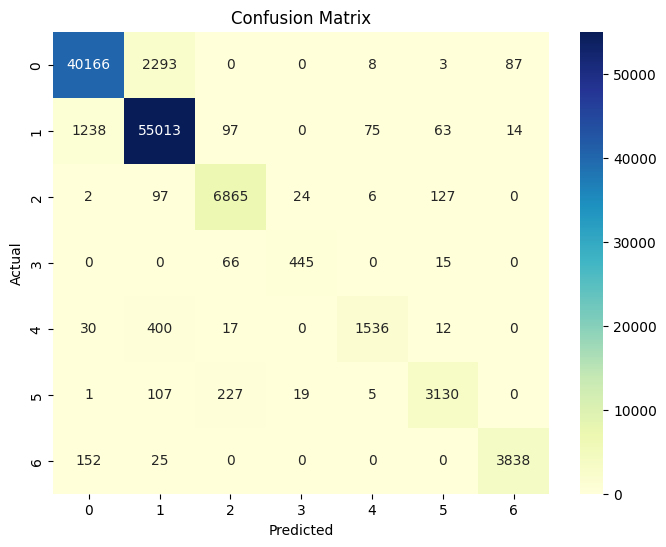

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### 📌 Feature Importance
Visualize which features are most important to the Random Forest model.


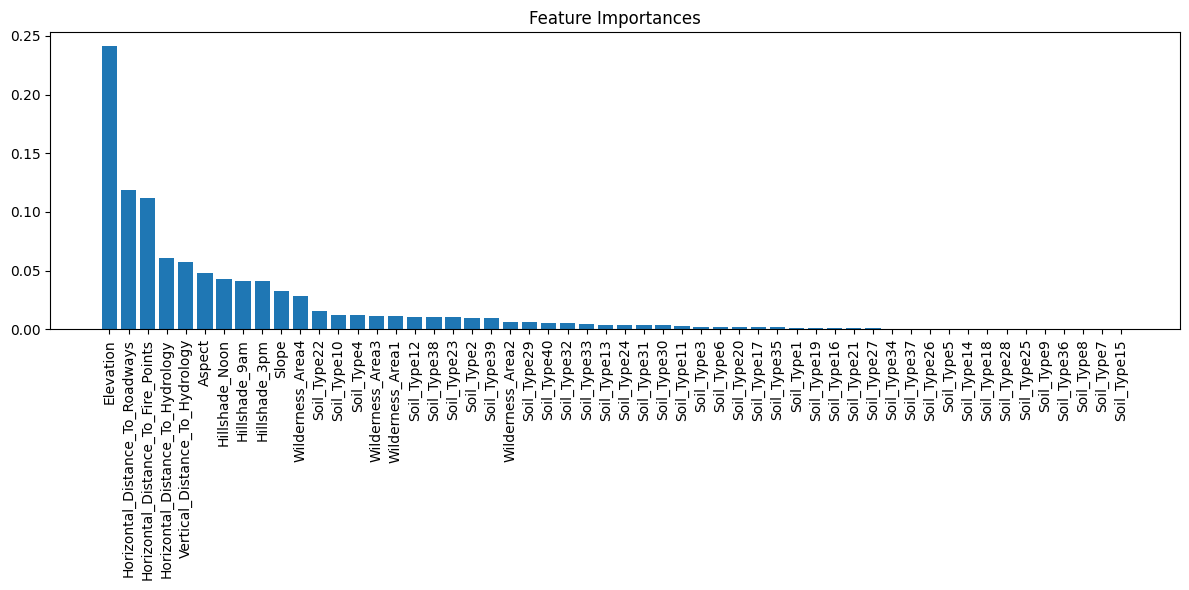

In [13]:
importances = rf_model.feature_importances_
features = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), features[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


## ✅ Conclusion

- The Random Forest model achieved good accuracy on the cover type prediction task.
- Feature importance revealed which landscape features were most useful in classification.
- Future improvements may include hyperparameter tuning, trying other classifiers (e.g., Gradient Boosting), or feature selection.

---

📌 **Next Steps**:
- Try GridSearchCV to improve model performance.
- Compare with other models (DecisionTree, XGBoost, etc.)
